In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:\\Users\\GK\Desktop\\ML\\Stock_price_prediction\\dataset.csv")
dataset.head()

,Date,Close,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [3]:
dataset = dataset.replace({'Change %' : '%'} ,'' , regex=True)
dataset['Change %'] = dataset['Change %'].astype(float)
dataset['Change %'].dtype

dtype('float64')

In [4]:
dataset = dataset.replace({'Vol.' : 'M'} ,'' , regex=True)
dataset['Vol.'] = dataset['Vol.'].astype(float)
dataset['Vol.'].dtype

dtype('float64')

In [5]:
dataset['Vol.'] = dataset['Vol.'] * 1000000 
dataset.head()

,Date,Close,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44820000.0,-0.16
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59740000.0,-0.26
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68890000.0,-0.08
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43870000.0,-0.34
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72460000.0,0.42


In [6]:
x  = dataset[['Open','High','Low','Vol.' ,'Change %']]
y = dataset['Close']

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y , random_state = 0)

In [8]:
x_train.shape

(1038, 5)

In [9]:
x_test.shape

(347, 5)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
predicted=regressor.predict(x_test)
print(x_test)

        Open    High     Low        Vol.  Change %
1355  288.90  289.00  278.30  20960000.0     -0.58
1224  261.50  268.90  256.20  19030000.0     -1.13
108   312.00  314.65  301.10  59710000.0     -5.89
970   252.00  255.20  251.65  11380000.0      1.03
1036  198.80  205.70  196.20  39460000.0      3.07
...      ...     ...     ...         ...       ...
828   292.00  295.00  288.50  20190000.0      0.81
1382  316.25  316.80  312.10   9140000.0     -0.79
1029  210.00  212.80  208.30  27860000.0     -0.36
64    172.45  173.80  166.10  55940000.0     -2.40
608   271.50  272.00  256.65  43850000.0     -1.16

[347 rows x 5 columns]


In [12]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)

      Actual   Predicted
1355  284.30  282.205102
1224  267.50  261.829076
108   303.00  301.843902
970   254.60  254.346310
1036  204.95  203.936560
...      ...         ...
828   293.40  292.186620
1382  312.75  313.183467
1029  209.95  210.136345
64    166.65  167.282560
608   268.50  262.133860

[347 rows x 2 columns]


In [13]:
dfr.head(25)

,Actual,Predicted
1355,284.30,282.205102
1224,267.50,261.829076
108,303.00,301.843902
970,254.60,254.346310
1036,204.95,203.936560
302,344.70,346.233703
901,265.40,264.600634
315,309.95,306.967042
1182,251.25,252.025590
1177,236.90,234.756915


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor.score(x_test,y_test)

0.9986624291281501

<AxesSubplot:>

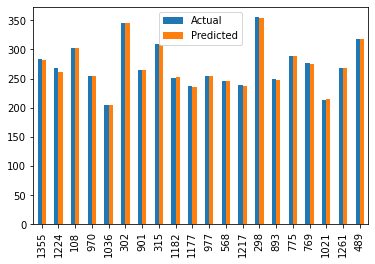

In [15]:
graph=dfr.head(20)
graph.plot(kind='bar')

In [16]:
import math
print('Mean Absolute Error:', end='')
print ("{0:.3f}".format(metrics.mean_absolute_error(y_test,predicted)))
print('Mean Squared  Error:', end='')
print ("{0:.3f}".format(metrics.mean_squared_error(y_test,predicted)))
print('Root Mean Squared Error:', end='')
print ("{0:.3f}".format(math.sqrt(metrics.mean_squared_error(y_test,predicted))))
print('Accuracy = ' , end='')
print ("{0:.2f}".format(regressor.score(x_test,y_test)*100) + '%')

Mean Absolute Error:1.111
Mean Squared  Error:2.845
Root Mean Squared Error:1.687
Accuracy = 99.87%
